<div style="text-align: left;"><img src="https://i.imgur.com/BC2sAdw.png" align="left" width="200" title="Universiteit Leiden"/ ></div>

<font color='#0C2577'><b>Improving the age at onset estimation for Huntington’s Disease using Machine Learning models on top of the Enroll-HD data</b></font>

<left><font color='#0C2577'>JC Marchiori Dias – BioInformatics Master Thesis 2023/2024 - Notebook 1</font></left> 

<left><font color='#0C2577'>Leiden University - LUMC BioSemantics Group</font></left>

#### Import Libraries

In [1]:
## Importing Relevant Python Libraries

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 
import pandas as pd
import numpy as np
import random
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt


#### Options for the notebook

In [2]:
## Set options for pandas
# to have better/more output from lists/dataframes

pd.options.display.max_rows = 100
pd.set_option('display.max_columns', None)

#### Loading Datasets

In [3]:
## Import of pre-processed and imputed data, created by LUMC BioSemantics Group

# Enroll-HD dataset is available after the associated Consortium evaluation and approval, therefore this data cannot be 
# found elsewhere and its location here is private. 

hd_imputed_df = pd.read_csv("~/Study/HD/my_project/hd_workflow_data/data_output/aao_feature_all/imputed_dfs/New_All_cases.csv", index_col="patient_num")

#### HD Data Exploration

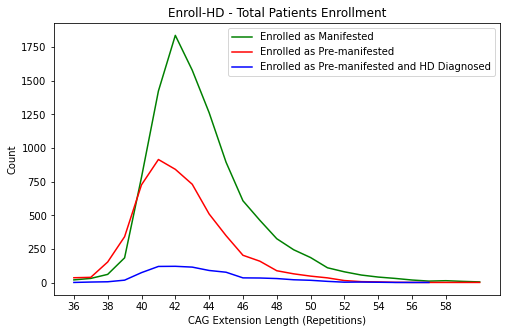

In [4]:
## Counting of Total Patients Enrolled 

std_cat1_df = hd_imputed_df[(hd_imputed_df['hddiagn']>0)&(hd_imputed_df['hdcat_0']==2.0)]
std_cat2_df = hd_imputed_df[hd_imputed_df['hdcat_0']==2.0]
std_cat3_df = hd_imputed_df[hd_imputed_df['hdcat_0']==3.0]

x1, y1 = np.unique(std_cat1_df.groupby('subjid').first()['caghigh'], return_counts=True)
x2, y2 = np.unique(std_cat2_df.groupby('subjid').first()['caghigh'], return_counts=True)
x3, y3 = np.unique(std_cat3_df.groupby('subjid').first()['caghigh'], return_counts=True)

fig, axs = plt.subplots(1,1, figsize=(8,5))
sns.lineplot(x=x3, y=y3, color='g', label='Enrolled as Manifested')
sns.lineplot(x=x2, y=y2, color='r', label='Enrolled as Pre-manifested')
sns.lineplot(x=x1, y=y1, color='b', label='Enrolled as Pre-manifested and HD Diagnosed')

plt.xticks(range(36, 60, 2))
plt.xlabel('CAG Extension Length (Repetitions)')
plt.ylabel('Count')
plt.title('Enroll-HD - Total Patients Enrollment')
plt.show()


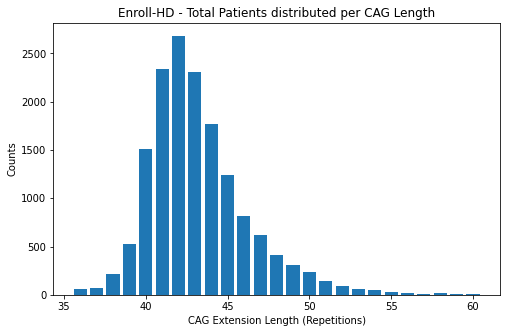

In [5]:
## Counting of Total Patients Enrolled 

x, y = np.unique(hd_imputed_df.groupby('subjid').first()['caghigh'], return_counts=True)

fig, axs = plt.subplots(1,1, figsize=(8,5))
plt.bar(x, y)
plt.xlabel('CAG Extension Length (Repetitions)')
plt.ylabel('Counts')
plt.title('Enroll-HD - Total Patients distributed per CAG Length')
plt.show()

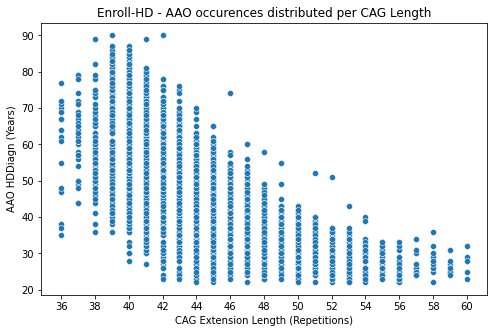

In [6]:
## Counting of Total Patients Enrolled 

feat_imp_set = hd_imputed_df.groupby('subjid').first()[['caghigh', 'hddiagn']]

fig, axs = plt.subplots(1,1, figsize=(8,5))
sns.scatterplot(data=feat_imp_set, x="caghigh", y="hddiagn")
plt.title('Enroll-HD - AAO occurences distributed per CAG Length')
plt.xticks(range(36, 61, 2))
plt.xlabel('CAG Extension Length (Repetitions)')
plt.ylabel('AAO HDDiagn (Years)')
plt.show()

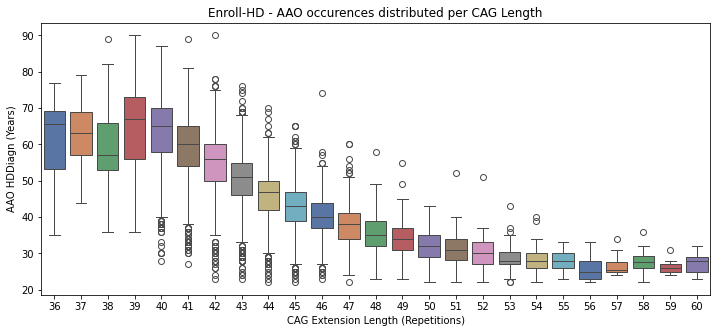

In [7]:
## Counting of Total Patients Enrolled 

feat_imp_set = hd_imputed_df.groupby('subjid').first()[['caghigh', 'hddiagn']]

fig, axs = plt.subplots(1,1, figsize=(12,5))
sns.boxplot(data=feat_imp_set, x="caghigh", y="hddiagn", palette='deep')
plt.title('Enroll-HD - AAO occurences distributed per CAG Length')
plt.xlabel('CAG Extension Length (Repetitions)')
plt.ylabel('AAO HDDiagn (Years)')
plt.show()

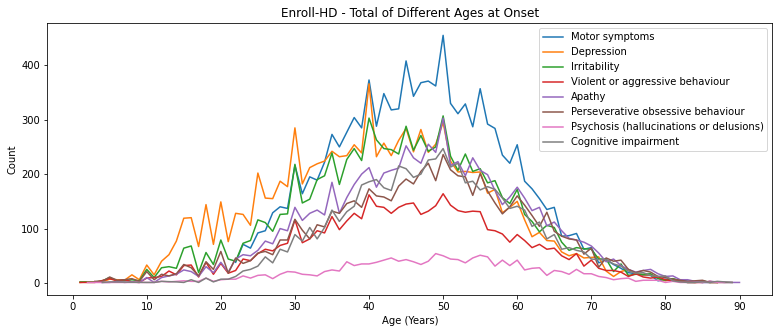

In [8]:
## Counting of Total Patients Enrolled and its different onsets

target_pp = ['ccmtrage', 'ccdepage', 'ccirbage', 'ccvabage', 'ccaptage', 'ccpobage', 'ccpsyage', 'cccogage']
name_pp = ['Motor symptoms','Depression','Irritability', 'Violent or aggressive behaviour', 'Apathy',
           'Perseverative obsessive behaviour', 'Psychosis (hallucinations or delusions)', 'Cognitive impairment']

fig, axs = plt.subplots(1,1, figsize=(13,5))
for tgt, name in zip(target_pp, name_pp):
    x1, y1 = np.unique(hd_imputed_df.groupby('subjid').first()[tgt], return_counts=True)
    sns.lineplot(x=x1, y=y1, palette= 'deep', label=name)
    plt.xticks(range(0, 91, 10))
    plt.xlabel('Age (Years)')
    plt.ylabel('Count')
    plt.title('Enroll-HD - Total of Different Ages at Onset')
plt.show()

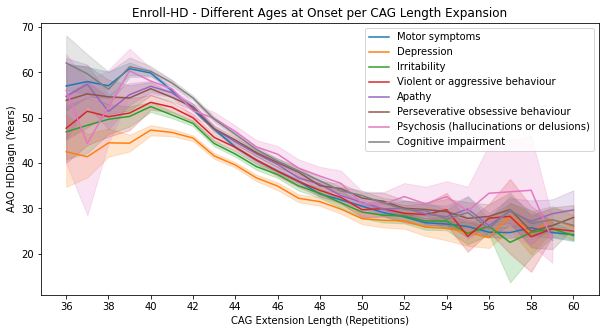

In [9]:
## Counting of Total Patients Enrolled and its different onsets

target_pp = ['ccmtrage', 'ccdepage', 'ccirbage', 'ccvabage', 'ccaptage', 'ccpobage', 'ccpsyage', 'cccogage']
name_pp = ['Motor symptoms','Depression','Irritability', 'Violent or aggressive behaviour', 'Apathy',
           'Perseverative obsessive behaviour', 'Psychosis (hallucinations or delusions)', 'Cognitive impairment']

fig, axs = plt.subplots(1,1, figsize=(10,5))
for tgt, name in zip(target_pp, name_pp):
    feat_study_set = hd_imputed_df.groupby('subjid').first()[['caghigh', tgt]]
    feat_study_set = feat_study_set.dropna(subset = [tgt])
    
    sns.lineplot(data=feat_study_set, x="caghigh", y=tgt, palette= 'deep', label=name)
    plt.xticks(range(36, 61, 2))
    plt.xlabel('CAG Extension Length (Repetitions)')
    plt.ylabel('AAO HDDiagn (Years)')
    plt.title('Enroll-HD - Different Ages at Onset per CAG Length Expansion')
plt.show()

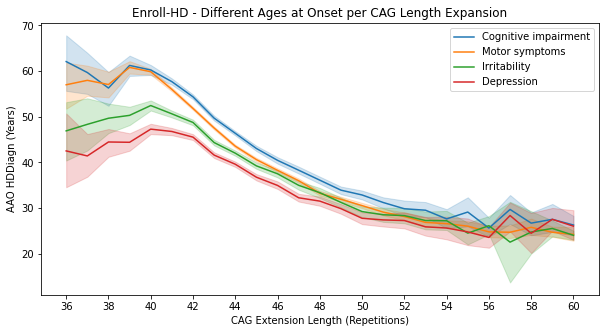

In [10]:
## Counting of Total Patients Enrolled and its different onsets

target_pp = ['cccogage', 'ccmtrage', 'ccirbage', 'ccdepage']
name_pp = ['Cognitive impairment', 'Motor symptoms', 'Irritability', 'Depression']

fig, axs = plt.subplots(1,1, figsize=(10,5))
for tgt, name in zip(target_pp, name_pp):
    feat_study_set = hd_imputed_df.groupby('subjid').first()[['caghigh', tgt]]
    feat_study_set = feat_study_set.dropna(subset = [tgt])
    
    sns.lineplot(data=feat_study_set, x="caghigh", y=tgt, palette= 'deep', label=name)
    plt.xticks(range(36, 61, 2))
    plt.xlabel('CAG Extension Length (Repetitions)')
    plt.ylabel('AAO HDDiagn (Years)')
    plt.title('Enroll-HD - Different Ages at Onset per CAG Length Expansion')
plt.show()

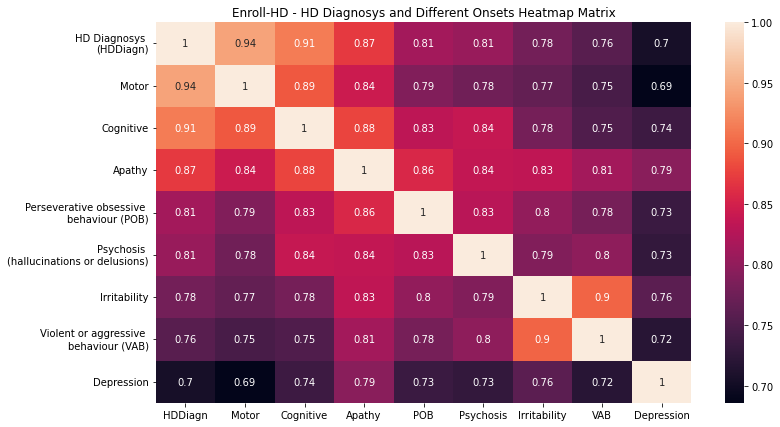

In [11]:
## Counting of Total Patients Enrolled and its different onsets
## Heatmap Matrix

onsets = ['hddiagn','ccmtrage', 'cccogage', 'ccaptage', 'ccpobage', 'ccpsyage', 'ccirbage', 'ccvabage', 'ccdepage']
y_axis_labels = ['HD Diagnosys \n(HDDiagn)','Motor', 'Cognitive', 'Apathy', 'Perseverative obsessive \nbehaviour (POB)',
                 'Psychosis \n(hallucinations or delusions)', 'Irritability', 'Violent or aggressive \nbehaviour (VAB)', 'Depression']
x_axis_labels = ['HDDiagn','Motor', 'Cognitive', 'Apathy', 'POB', 'Psychosis', 'Irritability', 'VAB', 'Depression']

subset_train = hd_imputed_df.groupby('subjid').first().loc[:, onsets]
cor = subset_train.corr()
plt.figure(figsize = (12,7))
sns.heatmap(cor, annot = True, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.title('Enroll-HD - HD Diagnosys and Different Onsets Heatmap Matrix')
plt.show()

## -------------------------------------------------------------------